In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_is = pd.read_csv('/content/drive/MyDrive/DS Capstone/data/sp500/Income_Statement_quarterly.csv')
df_is['date'] = pd.to_datetime(df_is.date, format='%Y-%m-%d')
df_is['filing_date'] = pd.to_datetime(df_is.filing_date, format='%Y-%m-%d')
# df_meta = pd.read_csv('/content/drive/MyDrive/DS Capstone/data/sp500/sp500_meta.csv')
# df_is_meta = df_is.merge(df_meta, left_on = "symbol", right_on = "Code")

In [4]:
df_is.columns

Index(['symbol', 'date', 'filing_date', 'currency_symbol',
       'researchDevelopment', 'effectOfAccountingCharges', 'incomeBeforeTax',
       'minorityInterest', 'netIncome', 'sellingGeneralAdministrative',
       'sellingAndMarketingExpenses', 'grossProfit', 'reconciledDepreciation',
       'ebit', 'ebitda', 'depreciationAndAmortization',
       'nonOperatingIncomeNetOther', 'operatingIncome',
       'otherOperatingExpenses', 'interestExpense', 'taxProvision',
       'interestIncome', 'netInterestIncome', 'extraordinaryItems',
       'nonRecurring', 'otherItems', 'incomeTaxExpense', 'totalRevenue',
       'totalOperatingExpenses', 'costOfRevenue', 'totalOtherIncomeExpenseNet',
       'discontinuedOperations', 'netIncomeFromContinuingOps',
       'netIncomeApplicableToCommonShares',
       'preferredStockAndOtherAdjustments'],
      dtype='object')

In [5]:
to_drop_1 = ['ebit', 'depreciationAndAmortization', 
                'effectOfAccountingCharges', 'discontinuedOperations',
                'nonRecurring', 'otherItems', 'extraordinaryItems',
                'reconciledDepreciation', 'nonOperatingIncomeNetOther']

df_is.drop(columns=to_drop_1, inplace=True)

**Justification for the selection of dropped variables:**

Because we are dealing with the income statement data, we know certain features are related arithmetically. And the presence of one such variable does not reveal more information to reflect the companies' financial performance and economic prospect, with the presence of another such variable. For example, we are given EBITDA ('ebitda'), EBIT ('ebit') and depreciation & amortization ('depreciationAndAmortization') in the dataset. And based on the formula, $EBITDA = EBIT + \text{Depreciation & Amortization}$, we can drop EBIT and depreciation & amortization as EBITDA is a more widely used measure for corporate profitability as depreication & amortization relates only to the cost of the companies' physical assets and not on their daily business operation. Some variables include costs that are results of changes in administrative methods or non-recurring events, such as 'otherItems',  'effectOfAccountingCharges'. We believe including those only add additional noises that adversely impact model performance.

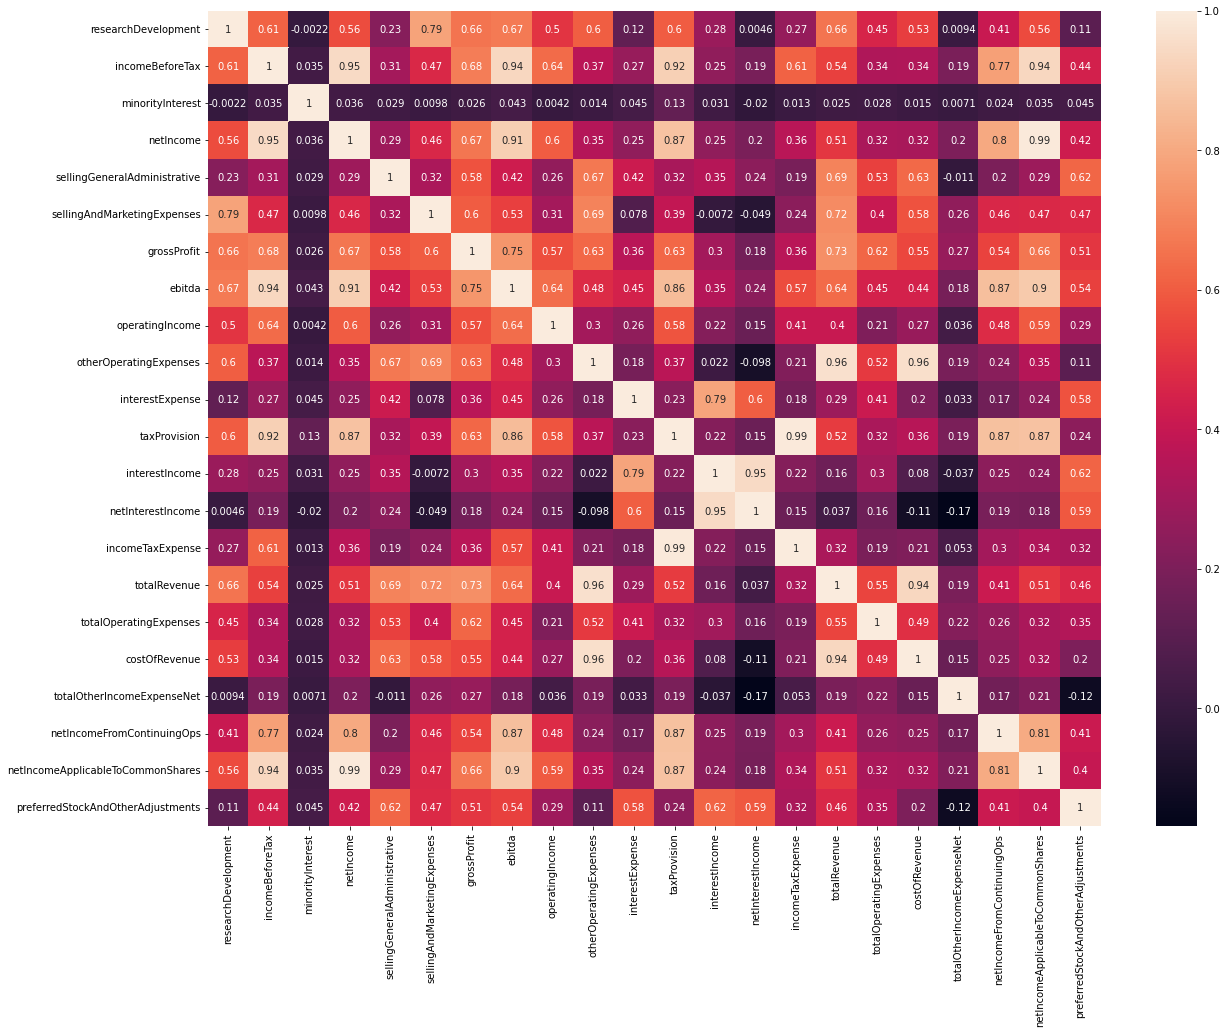

In [7]:
# correlation matrix
corr_matrix = df_is.corr()
sns.heatmap(corr_matrix, annot=True)
plt.rcParams["figure.figsize"] = (25,15)
plt.show()

In [8]:
def clean(df,corr_matrix,threshold=0.7):

  corr_matrix_abs = corr_matrix.abs()
  mat=np.array(corr_matrix_abs)
  corr_matrix_abs["counts"]=[np.sum(item>threshold)-1 for item in mat]
  corr_matrix_abs=corr_matrix_abs.sort_values(by=['counts'])
  corr_matrix_abs=corr_matrix_abs[corr_matrix_abs.index]
  #Sort by the number of correlated columns, remove those with as many correlated ones as possible

  upper = corr_matrix_abs.where(np.triu(np.ones(corr_matrix_abs.shape), k=1).astype(bool))
  to_drop_2 = [column for column in upper.columns if any(upper[column] > threshold)]

  # Dropping empty columns

  print(*to_drop_2, sep='\n')

  df.drop(columns=to_drop_2, inplace=True)

In [9]:
clean(df_is, df_is.corr())

interestIncome
sellingAndMarketingExpenses
costOfRevenue
totalRevenue
netIncome
incomeBeforeTax
netIncomeFromContinuingOps
taxProvision
ebitda
